In [2]:
import pandas as pd

In [3]:
notas = pd.read_csv('dados/ratings.csv')

In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.shape

(100836, 4)

In [6]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [9]:
notas['rating'].mean()

3.501556983616962

<AxesSubplot:ylabel='Frequency'>

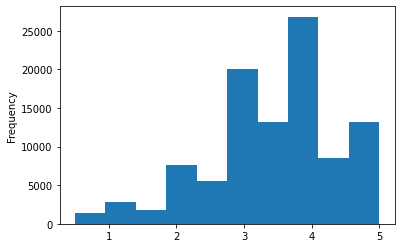

In [10]:
notas.rating.plot(kind='hist')

In [11]:
print(f'Média: {notas.rating.mean()}')
print(f'Mediana: {notas.rating.median()}')

Média: 3.501556983616962
Mediana: 3.5


In [12]:
notas.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
import seaborn as sns

<AxesSubplot:>

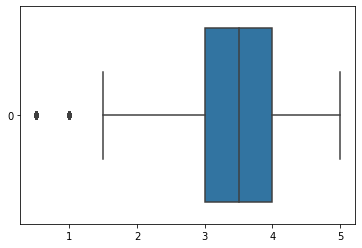

In [14]:
sns.boxplot(data=notas.rating, orient='h')

In [15]:
filme = pd.read_csv('dados/movies.csv')

In [16]:
filme.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas por filme

In [17]:
notas.query("movieId == 1").rating.mean()

3.9209302325581397

In [18]:
notas.query("movieId == 2").rating.mean()

3.4318181818181817

In [19]:
medias_por_filme = notas.groupby("movieId").mean()["rating"]
medias_por_filme.sample(10)

movieId
131724    5.000000
1946      3.833333
8577      4.000000
7368      3.500000
509       3.540984
1297      3.675000
1326      1.125000
31437     4.250000
3192      3.000000
5752      3.000000
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

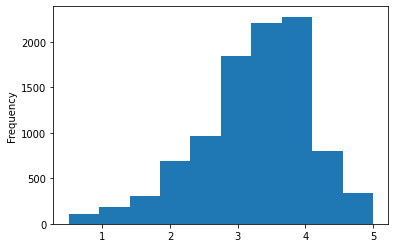

In [20]:
medias_por_filme.plot(kind='hist')

/home/wilian/Dev/miniconda3/envs/curso/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

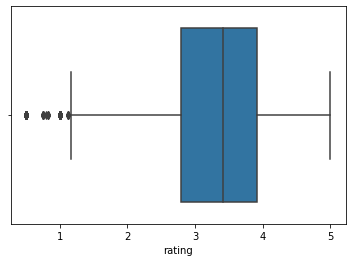

In [21]:
sns.boxplot(medias_por_filme)

In [22]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

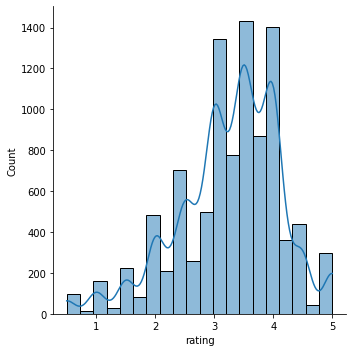

In [23]:
sns.displot(medias_por_filme, bins=20, kde=True)

Text(0.5, 1.0, 'Histograma Media Notas')

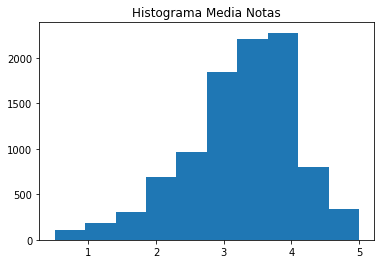

In [24]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma Media Notas")

In [25]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")

In [26]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [28]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [29]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head(5)

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

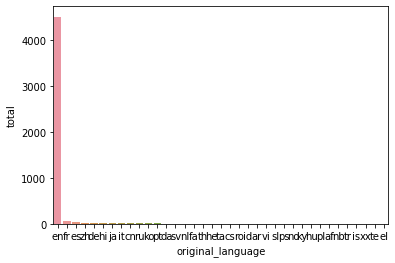

In [30]:
sns.barplot(data=contagem_de_lingua, x="original_language", y="total")

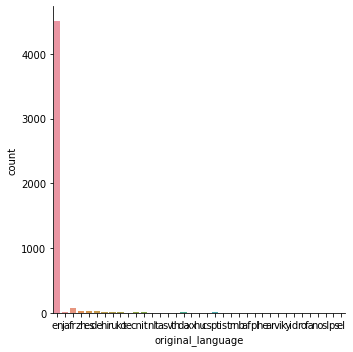

In [31]:
sns.catplot(data=tmdb, x="original_language", kind="count")

In [32]:
total_por_lingua = tmdb.original_language.value_counts()

In [33]:
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_resto)

4803 4505 298


In [34]:
df_linguas = pd.DataFrame({
  'lingua': ['ingles', 'outros'],
  'total': [total_de_ingles, total_resto]
})
df_linguas

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

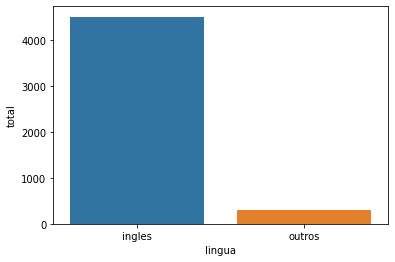

In [35]:
sns.barplot(data=df_linguas, x='lingua', y='total')

In [36]:
total_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_outras_linguas

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [37]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")
filmes_outras_linguas

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

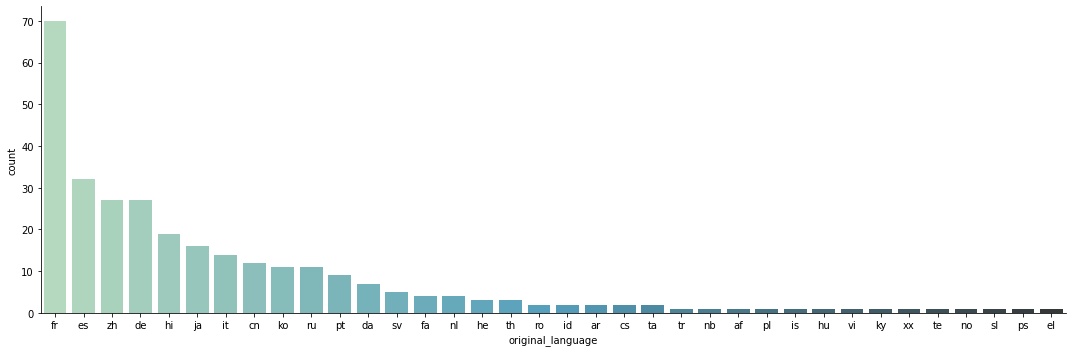

In [38]:
sns.catplot(x="original_language",
            kind="count",
            data=filmes_outras_linguas,
            aspect=3,
            palette="GnBu_d",
            order=total_outras_linguas.index)

In [39]:
filme.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [40]:
notas_toystory = notas.query("movieId == 1")
notas_jumanji = notas.query("movieId == 2")
print(len(notas_toystory), len(notas_jumanji))

215 110


In [41]:
print("Nota média Toy Story %.2f" % notas_toystory.rating.mean())
print("Nota média Jumanji %.2f" % notas_jumanji.rating.mean())

Nota média Toy Story 3.92
Nota média Jumanji 3.43


In [42]:
print("Nota mediana Toy Story %.2f" % notas_toystory.rating.median())
print("Nota mediana Jumanji %.2f" % notas_jumanji.rating.median())

Nota mediana Toy Story 4.00
Nota mediana Jumanji 3.50


In [46]:
print(f'Toy story:\n{notas_toystory.rating.describe()}\n')
print(f'Jumanji:\n{notas_jumanji.rating.describe()}')

Toy story:
count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

Jumanji:
count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


In [48]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [49]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c6b75ac10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c6b75a910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c6b75a250>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9c6b75e190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c6b75e940>,
 'means': []}

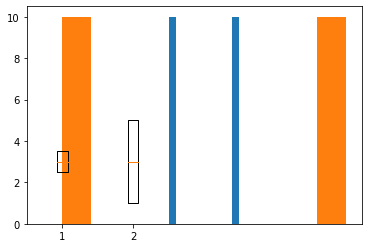

In [54]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c6b778820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c6b778f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c6b778490>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9c6b57c6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c6b57ca60>,
 'means': []}

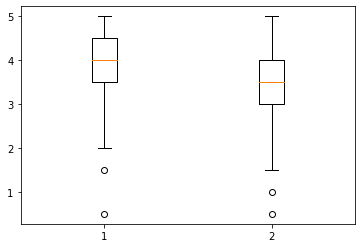

In [56]:
plt.boxplot([notas_toystory.rating, notas_jumanji.rating])

<AxesSubplot:xlabel='movieId', ylabel='rating'>

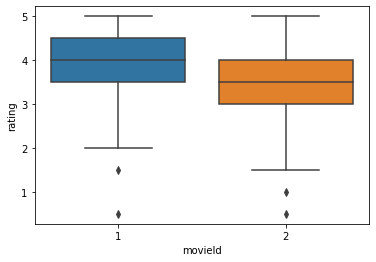

In [57]:
sns.boxplot(x='movieId', y='rating', data=notas.query("movieId in [1,2]"))